## Problema de impedancia de entrada. Línea en abierto.

Una línea en abierto tiene una impedancia característica de $Z_0=50$ $\Omega$ y una constante de fase $\beta= 3$ rad/m. Determinar la impedancia de entrada para una línea de i) 5 m, ii) 10 m, iii) 2$\lambda$.

Podemos usar el ejemplo 1.6 como referencia. 
Partimos de la expresión (1.48) que es la expresión general de la impedancia de onda para una línea sin pérdidas.

In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
from lines import *

Vamos a hacer uso de la función `Zwn` de `lines.py`.

In [13]:
z0=50
be=3
la=2.*pi/be
print('Longitud de onda (m)={0:9.3E}'.format(la))

Longitud de onda (m)=2.094E+00


In [17]:
zetasp=np.array([5./la,10./la,1])
zws=Zwn(zetasp,1E9)*z0
print(zws)
for i in range(len(zetasp)):
    print('Imped. en {0:5.2F}={1:5.2F}'.format(zetasp[i]*la,zws[i]))

[1.18238453e-07+5.84116653e+01j 5.12186720e-08+7.80599761e+00j
 5.00000000e+10+1.22464680e+04j]
Imped. en  5.00=0.00+58.41j
Imped. en 10.00=0.00+7.81j
Imped. en  2.09=50000000000.00+12246.47j


## Problema general de cálculo de voltaje en la línea

Se tiene un sistema de generador, línea y carga con los siguientes datos: 

$V_g=10$ V; $Z_g=50$ $\Omega$; $f=1$ MHz; $Z_0=75$ $\Omega$; $v_f= 1.5\cdot 10^8$ m/s; $l=100$ m; $Z_L=50+\jmath 40$ $\Omega$.

Determinar el voltaje, intensidad e impedancia de onda en: i)el comienzo de la línea; ii) en la carga; iii) a 3 m de la carga.


In [20]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [21]:
from lines import *

In [22]:
z0=75
vg=10
zg=50
zl=50+1.j*40
ll=100
f=1E6
vf=1.5E8

In [23]:
puntosz=np.array([0,ll,ll-3])

Siguiendo el procedimiento de análisis del sistema, determinamos la impedancia de entrada y aplicando teoría de circuitos, el voltaje y la intensidad a la entrada. A partir de estos datos se determina el voltaje de la onda incidente y reflejada al comienzo de la línea:

In [24]:
beta=2.*pi*f/vf
londa=vf/f
gammaL=Gr(zl/z0)
zin=Zwn(ll/londa,zl/z0)*z0
i0=vg/(zin+zg)
v0=zin*i0
v0p=0.5*(v0+z0*i0)
v0m=0.5*(v0-z0*i0)

Con estos valores podemos definir las funciones voltaje e intensidad en cada punto de la línea:

In [25]:
def v(z):
    return v0p*np.exp(-1.j*2.*np.pi*z/londa)+\
            v0m*np.exp(1.j*2.*np.pi*z/londa)
def co(z):
    return (v0p*np.exp(-1.j*2.*np.pi*z/londa)-\
            v0m*np.exp(1.j*2.*np.pi*z/londa))/z0

In [27]:
print('Impedancia de entrada (ohmios)={0:5.2F}'.format(zin))
print('Voltaje a la entrada en modulo (V) y fase (grados)={0:5.2F},{1:5.2F}'.
      format(*C2pD(v0)))
print('Intensidad a la entrada en modulo (A) y fase (grados)={0:5.2F},{1:5.2F}'.
      format(*C2pD(i0)))
print('Voltaje a la entrada de la onda incidente en modulo (V) y fase (grados)\
={0:5.2F},{1:5.2F}'.format(*C2pD(v0p)))
print('Voltaje a la entrada de la onda reflejada en modulo (V) y fase (grados)\
={0:5.2F},{1:5.2F}'.format(*C2pD(v0m)))

Impedancia de entrada (ohmios)=149.35-33.44j
Voltaje a la entrada en modulo (V) y fase (grados)= 7.57,-3.10
Intensidad a la entrada en modulo (A) y fase (grados)= 0.05, 9.52
Voltaje a la entrada de la onda incidente en modulo (V) y fase (grados)= 5.61, 1.04
Voltaje a la entrada de la onda reflejada en modulo (V) y fase (grados)= 2.02,-14.69


Podemos representar el módulo y la fase del voltaje en cada punto de la línea:

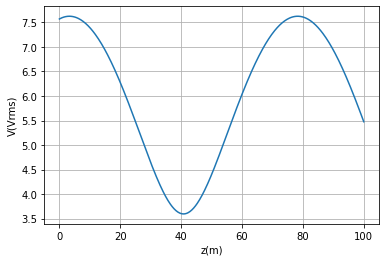

In [28]:
zs=np.linspace(0,ll,500)
vs=v(zs)
plt.grid()
plt.plot(zs,abs(vs))
plt.xlabel('z(m)')
plt.ylabel('V(Vrms)')
plt.show()

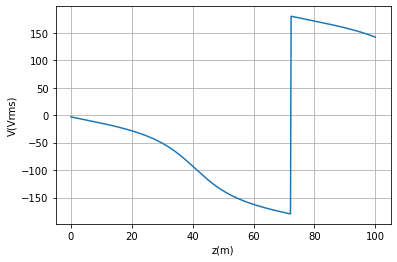

In [29]:
zs=np.linspace(0,ll,500)
vs=v(zs)
plt.grid()
plt.plot(zs,np.angle(vs)*R2d)
plt.xlabel('z(m)')
plt.ylabel('V(Vrms)')
plt.show()

In [ ]:
Los valores de voltaje en los puntos indicados:

In [30]:
voltajesz=C2pD(v(puntosz))
intensidadesz=C2pD(co(puntosz))
impez=np.array(list(Zwn((ll-i)/londa,zl/z0) for i in puntosz))*z0

In [31]:
for i in range(len(puntosz)):
    print('Voltaje (mod V,fase grados) en {0:5.2F}={1:5.2F},{2:5.2F}'.\
          format(puntosz[i],voltajesz[0][i],voltajesz[1][i]))

Voltaje (mod V,fase grados) en  0.00= 7.57,-3.10
Voltaje (mod V,fase grados) en 100.00= 5.47,141.96
Voltaje (mod V,fase grados) en 97.00= 5.97,148.00


In [32]:
for i in range(len(puntosz)):
    print('Intensidad (mod A,fase grados) en {0:5.2F}={1:5.2F},{2:5.2F}'.\
          format(puntosz[i],intensidadesz[0][i],intensidadesz[1][i]))

Intensidad (mod A,fase grados) en  0.00= 0.05, 9.52
Intensidad (mod A,fase grados) en 100.00= 0.09,103.30
Intensidad (mod A,fase grados) en 97.00= 0.08,108.46


In [33]:
for i in impez:
    print('Imp. onda (ohmios)={0:5.2F}'.format(i))


Imp. onda (ohmios)=149.35-33.44j
Imp. onda (ohmios)=50.00+40.00j
Imp. onda (ohmios)=57.93+47.82j


Como vemos la impedancia de onda al final de la línea coincide con la impedancia de carga.

## Problema de intensidad de corriente en un punto de la línea

Determinar la intensidad de corriente a $\lambda/8$ de la carga en una línea de 75 $\Omega$ de impedancia característica y con una carga de $Z_L=45+ \jmath 25$ $\Omega$. No se saben datos del generador pero se conoce el voltaje en la carga: $V_L=10 e^{\jmath 25^o}$ V.

A 50 $\Omega$ lossless line has $V_L=10 e^{\jmath 25^o}$ V, $Z_L=50 e^{\jmath 30^o}$. Find the current at $\lambda/8$ from the load.

In [32]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [33]:
from lines import *

In [35]:
z0=75.      # Impedancia caracteristica
vl=10.*np.exp(1.j*25.*D2r)     # Voltaje en la carga
zl=45+25j     # Impedancia de carga
zpn=1./8.                      # Punto en la linea

In [36]:
Zwn(zpn,zl/z0)*z0

(111.878453038674+49.30939226519339j)

Voltaje e intensidad de corriente en una línea, en función de la distancia a la carga, vienen dados por las expresiones (1.46).

Pensad en las incógnitas que hay en cada ecuación.


In [37]:
C2pD(Gr(zl/z0))

(0.3185867294156079, 128.4261399757142)

In [38]:
il=vl/zl
vlp=0.5*(vl+il*z0)     # Deducir estas expresiones
vlm=0.5*(vl-il*z0)
izp=1/z0*(vlp*np.exp(1.j*2.*pi*zpn)-vlm*np.exp(-1.j*2.*pi*zpn))

In [39]:
print(C2pD(vlp))

(11.905682803555111, 7.713684832943502)


La solución, en módulo (en A) y fase (en grados) es:

In [40]:
print(C2pD(izp))

(0.12319982575064592, 37.93260839673951)


## Problema de impedancia de onda

Encontrar el punto en el que la impedancia de onda en una línea de transmisión que opera a 1 MHz tiene un valor de reactancia pura de 75 $\Omega$. Considerar que $Z_0=75$ $\Omega$ y que el dieléctrico se comporta como el vacío. Calcularlo para i) la línea está cortocircuitada; ii) la línea está en abierto.

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from lines import *

Los datos del problema son:

In [3]:
z0=75   # Impedancia intrinseca de la linea
xw=75   # Impedancia requerida a la entrada de la linea
f=1E6   # Frecuencia de trabajo
vf=3E8     # Velocidad de fase ¿DE DONDE SALE ESTE DATO?

Cálculos adicionales:

In [4]:
w=2.*pi*f  
be=w/vf
la=2*pi/be

In [5]:
print(la)

300.0


¿Cómo es la impedancia de onda en una linea en corto o en abierto?
Para el caso de línea en corto tenemos el ejemplo 1.6.

Partimos de la expresión (1.48) que es la expresión general de la impedancia de onda para una línea sin pérdidas.

Obtengamos una figura con la impedancia de onda en cada punto de la línea. Para ello particularizamos la ecuación (1.48) para el caso de corto y abierto. Como se puede comprobar la impedancia se hace reactiva pura, por lo que representamos la parte imaginaria:

In [18]:
def XwnSh(zpn):
    xwn=np.tan(2*pi*zpn)
    return xwn

def XwnOp(zpn):
    xwn=-1./np.tan(2*pi*zpn)
    return xwn

Comprobamos las definiciones con la función Zwn(zp,zln) definida en el paquete `lines`: 

In [19]:
print(Zwn(0.45,0),XwnSh(0.45))
print(Zwn(0.33,10**6),XwnOp(0.33))

-0.32491969623290645j -0.32491969623290645
(1.3022301776072001e-06+0.5497546521920543j) 0.5497546521927702


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-8-aabbd8e0c43c>:6: RuntimeWarning: divide by zero encountered in true_divide
  xwn=-1./np.tan(2*pi*zpn)


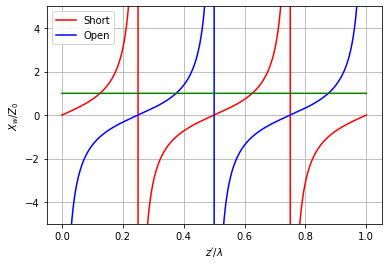

In [11]:
zps=np.linspace(0,1,6000)
xwns=np.ones(6000,dtype=float)*xw/z0
xwnShs=XwnSh(zps)
xwnOps=XwnOp(zps)
plt.plot(zps,xwnShs,c='r',label='Short')
plt.plot(zps,xwnOps,c='b',label='Open')
plt.plot(zps,xwns,c='g')
plt.ylim(-5,5)
plt.grid()
plt.xlabel(r"$z'/\lambda$")
plt.ylabel(r'$X_w/Z_0$')
plt.legend(loc=2)
plt.show()


In [12]:
z1=(np.arctan(xw/z0))/be
z2=(np.arctan(-z0/xw))/be+0.5*la
print(z1,z2)
print(z1/la,z2/la)

37.5 112.5
0.125 0.375


In [13]:
np.arctan(-z0/xw)

-0.7853981633974483

¿Por qué hay que sumarle $\lambda/2$ al caso del circuito abierto?

## Problema de reactancia de carga indeterminada

Determinar la capacitancia de un condensador en serie con una resistencia de 100 $\Omega$ para que en la línea que lo alimenta se produzca una SWR de 9. La línea tiene una impedancia característica $Z_0=75$ $\Omega$ y la velocidad de fase es $c$. La frecuencia de trabajo es de 10 MHz.   


In [2]:
from lines import *

In [1]:
z0=75
vf=3E8
f=10E6
rl=100
rln=rl/z0
s=9

In [3]:
w=2.*pi*f
gammo=(s-1)/(s+1)
xln=-np.sqrt(((rln+1)**2*gammo**2-(rln-1)**2)/(1-gammo**2))
xl=xln*z0
cap=-1/(xl*w)
print('Capacitancia ={0:9.3E} , \nValor absoluto de Gamma= {1:9.3E}'\
.format(cap,gammo))

Capacitancia =6.932E-11 , 
Valor absoluto de Gamma= 8.000E-01


In [4]:
zlco=rl+1.j*xl
gamco=Gr(zlco/z0)
print('coeficiente de reflexion={0:5.3} \n\
Fase en grados={1:5.3}'.\
      format(abs(gamco),np.angle(gamco)*R2d))

coeficiente de reflexion=  0.8 
Fase en grados=-31.1


Puede ser interesante resolverlo con la carta de Smith

## Problema de obtención de datos a partir de otros. 

Una línea tiene una longitud de $\lambda/4$ y una impedancia característica de 50 $\Omega$. La impedancia de carga es de 100 $\Omega$ y el voltaje es de 50 V. ¿Cuál es el voltaje al principio de la línea?

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from lines import *

In [3]:
vl=50
ln=0.25
z0=50
zl=100

In [4]:
gam=Gr(zl/z0)
vlp=vl/(1+gam)
v0=vlp*(1-gam)*1.j
print('Abs(V0)={0:9.3E} \nFase(V0,grad)={1:9.3E}'.format(*C2pD(v0)))

Abs(V0)=2.500E+01 
Fase(V0,grad)=9.000E+01


In [5]:
s=(1+abs(gam))/(1-abs(gam))
v0co=vl/s
print('s={0:9.3E} \nv0co={1:9.3E}'.format(s,v0co))

s=2.000E+00 
v0co=2.500E+01


## Impedancia de entrada a partir de una impedancia de onda
Una línea sin pérdidas opera a 200 MHz, tiene una longitud de 5 m, una impedancia característica $Z_0=50$ $\Omega$ y la velocidad de fase $v_f=0.8c$. Se mide la impedancia de onda a mitad de línea y resulta $Z_w=80-\jmath 60$ $\Omega$. Determinar la impedancia de entrada $Z_{in}$ y el coeficiente de reflexión en la carga $\Gamma_L$.


In [21]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from lines import *

In [3]:
z0=50
ll=5
f=200E6
vf=0.8*3E8
zwl2=80-1.j*60

In [4]:
lam=vf/f
x=np.tan(2*pi*ll/2./lam)
zl=z0*(-zwl2/z0+1.j*x)/(zwl2/z0*1.j*x-1)
#zl=(z0*zwl2-1.j*z0**2*np.tan(bzl2))/(z0-1.j*zwl2*np.tan(bzl2))
print(zl)

(112.55406747203317+49.1747388199082j)


In [6]:
zwl2co=Zwn(ll/2/lam,zl/z0)*z0
zin=Zwn(ll/lam,zl/z0)*z0
gam=Gr(zl/z0)
print(zin,zwl2co)
print('Gamma modulo y fase (deg)',C2pD(gam))

(28.681745894927534-34.042330244876524j) (80.00000000000001-60j)
Gamma modulo y fase (deg) (0.4685212856658182, 21.34019174591)


In [8]:
gal2=(zwl2-z0)/(zwl2+z0)
print(abs(gal2),np.angle(gal2)*R2d,np.angle(gal2))
print(gal2)

0.46852128566581824 -38.65980825409009 -0.6747409422235526
(0.3658536585365854-0.29268292682926833j)


In [9]:
galco=gal2*np.exp(4*pi*ll/2/lam*1j)
print(galco,gam)
print(C2pD(galco))

(0.4363976791564209+0.17049709894552698j) (0.4363976791564208+0.17049709894552703j)
(0.4685212856658183, 21.34019174590999)


## Problema general de potencias

Se tiene un sistema de generador, línea y carga. El generador viene definido por su voltaje, 10 V, y su impedancia interna, $Z_g=50$. La línea tiene una longitud especificada en longitudes de onda: $l=0.35\lambda$. La impedancia característica de la línea es de 50 $\Omega$. Por último la carga del sistema es de 100 $\Omega$.
Determinar la potencia entregada a la carga y compararla con la que suministra el generador. 


In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from lines import *

Introducimos los datos del problema. El esquema del problema es el de la figura 1.2.


In [3]:
lln=0.35   # Longitud de la linea normalizada
z0=50      # Impedancia intrinseca de la linea
vg=10      # Voltaje del generador
zg=50      # Impedancia intrinseca del generador
zl=100      # Impedancia de carga

Nos piden que calculemos la potencia suministrada a la línea.
Planteamos primero algunas cuestiones que resolveremos a continuación:
* ¿Qué potencia suministra el generador?
* ¿La potencia que suministra el generador es igual que la potencia recibida por la línea?
* ¿Es igual la potencia suministrada a la carga que la que entra en la línea?
* Y por último, ¿qué relación existe entre la potencia que transporta la onda incidente y la que transporta la onda reflejada con las potencias calculadas anteriormente?

Calculamos la potencia suministrada por el generador y la que entra en la línea según se indica en la sección 1.6.6. Para ello determinamos la impedancia a la entrada de la línea y con ella calculamos el voltaje y la intensidad a la entrada de la línea:

In [4]:
zin=Zwn(lln,zl/z0)*z0    # Cuidado: Zwn es impedancia normalizada
i0=vg/(zg+zin)
v0=i0*zin

In [5]:
print('Zin={0:9.3E} (Ohmios) \nI0={1:9.3E} (A) \nV0={2:9.3E} (V)'.format(zin,i0,v0))
print('|I0|={0:9.3E} (A) \n|V0|={1:9.3E} (V)'.format(abs(i0),abs(v0)))
print('Fase(I0)={0:9.3E} (o) \nFase(V0)={1:9.3E} (o)'.\
      format(np.angle(i0)*R2d,np.angle(v0)*R2d))

Zin=3.374E+01+2.407E+01j (Ohmios) 
I0=1.103E-01-3.170E-02j (A) 
V0=4.485E+00+1.585E+00j (V)
|I0|=1.148E-01 (A) 
|V0|=4.757E+00 (V)
Fase(I0)=-1.604E+01 (o) 
Fase(V0)=1.946E+01 (o)


Siguiendo los mismos pasos que en el ejemplo 1.9:

In [6]:
pge=0.5*(vg*np.conjugate(i0)).real
pin=0.5*(v0*np.conjugate(i0)).real

In [7]:
print('Pin={0:9.3E} (W) \nPge={1:9.3E} (W)'.format(pin,pge))

Pin=2.222E-01 (W) 
Pge=5.515E-01 (W)


¿En qué situación serían iguales estas dos potencias?

Ahora determinamos la potencia que transporta la onda incidente y la onda reflejada. Para ello calculamos la amplitud de cada una:

In [8]:
v0p=0.5*(v0+i0*z0)
v0n=0.5*(v0-i0*z0)
print('V0p (||,º=)',C2pD(v0p))
print('V0n (||,º=)',C2pD(v0n))

V0p (||,º=) (4.999999999999999, 0.0)
V0n (||,º=) (1.6666666666666659, 108.0)


Las potencias incidente y reflejada son:

In [12]:
pinp=0.5*(abs(v0p))**2/z0
pinn=0.5*(abs(v0n))**2/z0
print('P+={0:9.3E} (W) \nP-={1:9.3E} (W)'.format(pinp,pinn))
print('Pin={0:9.3E} (W) \nP+-P-={1:9.3E} (W)'.format(pin,pinp-pinn))

P+=2.500E-01 (W) 
P-=2.778E-02 (W)
Pin=2.222E-01 (W) 
P+-P-=2.222E-01 (W)


Evaluar la potencia reflejada a partir del coeficiente de reflexión

In [15]:
gam=Gr(zl/z0)
pinn2=pinp*(abs(gam))**2
print('Gamma modulo y fase (º)',C2pD(gam))
print('Pinn={0:9.3E} (W) \nPinn(a partir de Gamma)={1:9.3E} (W)'.format(pinn,pinn2))

Gamma modulo y fase (º) (0.3333333333333333, 0.0)
Pinn=2.778E-02 (W) 
Pinn(a partir de Gamma)=2.778E-02 (W)


Hacemos el cálculo de la potencia en la carga con los valores de voltaje e intensidad al final de la línea:

In [16]:
vlp=v0p*np.exp(-1.j*2.*pi*lln)
vln=vlp*gam
vl=vlp+vln
ilp=vlp/z0
iln=-vln/z0
il=ilp+iln

In [17]:
pl=0.5*(vl*np.conjugate(il)).real
plp=0.5*(vlp*np.conjugate(ilp)).real
pln=0.5*(vln*np.conjugate(iln)).real
print(pin, pl)
print(pinp,plp)
print(pinn,pln)

0.34559999999999996 0.3456
0.36 0.36000000000000004
0.014400000000000003 -0.014400000000000001


¿Qué representa este voltaje y por qué es igual que `v0p`?
Recordar lo que ocurre en la sección 1.5.1, en el comienzo de la línea en $t=0^+$. Pero esto ocurre solo porque la línea está adaptada al generador.

In [18]:
v0pco=vg/(zg+z0)*z0
print(v0p, v0pco)

(6+0j) 6.0
